# Zomato Dataset

# Section A                                                         

#  Title: Regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


.....

In [26]:
df = pd.read_csv('zomato.csv')
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [29]:
df.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [30]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [31]:
print("Missing Values:")
print(df.isnull().sum())
print("\nDuplicate Records:", df.duplicated().sum())

Missing Values:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Duplicate Records: 0


In [32]:
# Imputing missing values
# Imputing missing values and handling '-' in 'rate'
df['rate'] = df['rate'].str.replace('/5', '').replace('NEW', None).replace('-', None)
df['rate'] = df['rate'].astype(float)
df['votes'] = df['votes'].astype(float)
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)


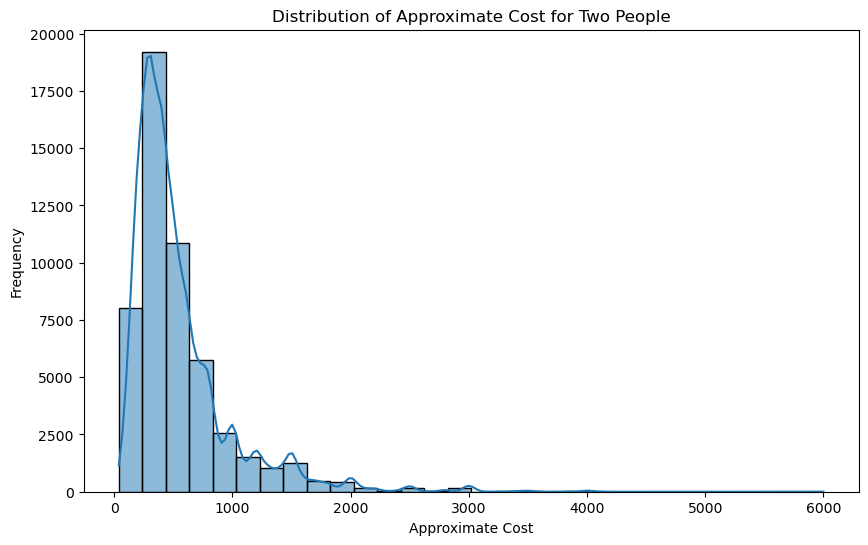

In [33]:
# Step 4: Performing EDA
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.show()

...

In [34]:
# Step 4: Drop unnecessary columns
df_model = df.drop(['url', 'address', 'name', 'phone', 'reviews_list', 'menu_item'], axis=1)


In [36]:
df_model.dtypes

online_order                    object
book_table                      object
rate                           float64
votes                          float64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [38]:
# Step 5: Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['online_order', 'book_table', 'location', 'rest_type', 'dish_liked', 'cuisines', 'listed_in(type)', 'listed_in(city)']
for col in categorical_cols:
    df_model[col] = label_encoder.fit_transform(df_model[col].astype(str))


In [40]:
print("Duplicate Records:", df_model.duplicated().sum())

Duplicate Records: 432


In [41]:
for col in ['rate', 'votes', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']:
    stat, p_value = stats.ttest_ind(df_model[col], df_model['approx_cost(for two people)'])
    if p_value < 0.05:
        print(f"{col} significantly impacts 'approx_cost(for two people)'")

votes significantly impacts 'approx_cost(for two people)'
location significantly impacts 'approx_cost(for two people)'
rest_type significantly impacts 'approx_cost(for two people)'
cuisines significantly impacts 'approx_cost(for two people)'
listed_in(type) significantly impacts 'approx_cost(for two people)'
listed_in(city) significantly impacts 'approx_cost(for two people)'


In [48]:
print(df_model.isnull().sum())
print(df_model.skew())
print(df_model.kurt())

online_order                       0
book_table                         0
rate                           10052
votes                              0
location                           0
rest_type                          0
dish_liked                         0
cuisines                           0
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64
online_order                  -0.360383
book_table                     2.272035
rate                          -0.328601
votes                          7.547819
location                       0.380244
rest_type                     -0.101658
dish_liked                    -1.049510
cuisines                      -0.098623
approx_cost(for two people)    2.614278
listed_in(type)                0.275206
listed_in(city)               -0.056174
dtype: float64
online_order                   -1.870197
book_table                      3.162267
rate                           -0.007483
vo

In [52]:
df_model['rate'].fillna(df_model['rate'].median(), inplace=True)

In [53]:
X = df_model.drop('approx_cost(for two people)', axis=1)
y = df_model['approx_cost(for two people)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_const).fit()
print(model_ols.summary())


                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.477
Model:                                     OLS   Adj. R-squared:                  0.476
Method:                          Least Squares   F-statistic:                     3766.
Date:                         Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                                 15:59:16   Log-Likelihood:            -2.9683e+05
No. Observations:                        41373   AIC:                         5.937e+05
Df Residuals:                            41362   BIC:                         5.938e+05
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The base OLS model has an R-squared value of 0.477, indicating that approximately 47.7% of the variance in the 'approx_cost(for two people)' can be explained by the independent variables in the model.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()  

vif = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
vif_df = pd.DataFrame({'Column': X_train_df.columns, 'VIF': vif})


In [61]:
vif_df

,Column,VIF
0,0,1.089585
1,1,1.380958
2,2,1.425628
3,3,1.368565
4,4,1.120949
5,5,1.196881
6,6,1.274103
7,7,1.097675
8,8,1.078858
9,9,1.110223


In [62]:
from sklearn.metrics import mean_squared_error, r2_score
performance_data = []

def model_performance(model, name):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
    
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)

    performance_data.append({'Name': name,
                             'Train_RMSE': rmse_train,
                             'Test_RMSE': rmse_test,
                             'Train_R2': r2_train,
                             'Test_R2': r2_test})
    
    print('Train RMSE:', rmse_train)
    print('Test RMSE:', rmse_test)
    print('Train R^2:', r2_train)
    print('Test R^2:', r2_test)



In [63]:
# Base Model
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)
model_performance(model_lr, 'Base Model (Linear Regression)')
performance_df = pd.DataFrame(performance_data)


Train RMSE: 315.96
Test RMSE: 315.36
Train R^2: 0.476594697400443
Test R^2: 0.488239415696633


In [64]:
# Building Model using Decision Tree

from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor().fit(X_train, y_train)
model_performance(model_dt , 'DecisionTree w/o tuning')


Train RMSE: 13.99
Test RMSE: 98.44
Train R^2: 0.9989744648787167
Test R^2: 0.9501377069883197


In [65]:
# Building Model using Random Forest

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor().fit(X_train, y_train)

model_performance(model_rf , 'RandomForest w/o tuning')

Train RMSE: 33.25
Test RMSE: 83.17
Train R^2: 0.9942042781151597
Test R^2: 0.9644036583418942


In [66]:
# Building model using Adaboost

from sklearn.ensemble import AdaBoostRegressor

model_ab = AdaBoostRegressor().fit(X_train, y_train)

model_performance(model_ab , 'AdaBost w/o tuning')

Train RMSE: 334.12
Test RMSE: 336.53
Train R^2: 0.41470875152417286
Test R^2: 0.4172375706901218


In [67]:
# Buidling model using Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor().fit(X_train, y_train)

model_performance(model_gb , 'GradientBoosting w/o tuning')

Train RMSE: 210.57
Test RMSE: 211.91
Train R^2: 0.7675392311385465
Test R^2: 0.7689333932384199


In [68]:
# Building Model using Xtreme Gradient Boosting 

from xgboost import XGBRegressor

model_xgb = XGBRegressor().fit(X_train, y_train)

model_performance(model_xgb , 'XGBoost w/o tuning')

Train RMSE: 107.29
Test RMSE: 122.79
Train R^2: 0.9396544310943602
Test R^2: 0.9224104935231405


In [69]:
# Building Model using KNN

from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor().fit(X_train, y_train)

model_performance(model_knn , 'KNN w/o tuning')

Train RMSE: 165.53
Test RMSE: 212.46
Train R^2: 0.8563388393007785
Test R^2: 0.767733786322111


In [70]:
performance_df = pd.DataFrame(performance_data)

In [71]:
performance_df 

,Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,Base Model (Linear Regression),315.96,315.36,0.476595,0.488239
1,DecisionTree w/o tuning,13.99,98.44,0.998974,0.950138
2,RandomForest w/o tuning,33.25,83.17,0.994204,0.964404
3,AdaBost w/o tuning,334.12,336.53,0.414709,0.417238
4,GradientBoosting w/o tuning,210.57,211.91,0.767539,0.768933
5,XGBoost w/o tuning,107.29,122.79,0.939654,0.922410
6,KNN w/o tuning,165.53,212.46,0.856339,0.767734


In [73]:
# GridsearchCV

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# RandomForest hyperparameter tuning

params = {'n_estimators' : [100,150,200] , 
         'max_depth' : [5,6,7,8],
         'max_features' : [None , 'sqrt' , 'log'] ,
         'min_samples_split' : [4,5,6,7,8,9]}

grid_rf = RandomizedSearchCV(estimator = RandomForestRegressor() , param_distributions= params , cv = 5).fit(X_train, y_train)

print(grid_rf.best_params_)

model_rf_tuned = grid_rf.best_estimator_.fit(X_train, y_train)

model_performance(model_rf_tuned , 'RandomForest with tuning')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    val

{'n_estimators': 100, 'min_samples_split': 7, 'max_features': None, 'max_depth': 8}
Train RMSE: 189.63
Test RMSE: 195.56
Train R^2: 0.8114710610082734
Test R^2: 0.8032184030628264


In [74]:
# XGBoost hyperparameter tuning

params = {'learning_rate': [0.1,0.2,0.5,0.8,1.0],
         'n_estimators': [150,175,200]
         }

grid_xgb = GridSearchCV(estimator = XGBRegressor() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_xgb.best_params_)

model_xgb_tuned = grid_xgb.best_estimator_.fit(X_train, y_train)

model_performance(model_xgb_tuned , 'XGBoost with tuning')

{'learning_rate': 0.5, 'n_estimators': 200}
Train RMSE: 67.83
Test RMSE: 97.0
Train R^2: 0.9758770369633667
Test R^2: 0.9515806376071211


In [75]:
# KNN hyperparameter tuning

params = {'n_neighbors': [10,30,50,70,90,100]}

grid_knn = GridSearchCV(estimator = KNeighborsRegressor() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_knn.best_params_)

model_knn_tuned = grid_knn.best_estimator_.fit(X_train, y_train)

model_performance(model_knn_tuned , 'KNN with tuning')

{'n_neighbors': 10}
Train RMSE: 200.07
Test RMSE: 223.98
Train R^2: 0.7901364569522686
Test R^2: 0.7418518529301846


In [76]:
# Ridge Regression

from sklearn.linear_model import Ridge

params = {'alpha': [0.1,10,100,150]}

grid_ridge = GridSearchCV(estimator = Ridge() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_ridge.best_params_)

model_ridge_tuned = grid_ridge.best_estimator_.fit(X_train, y_train)

model_performance(model_ridge_tuned , 'Ridge with tuning')

{'alpha': 10}
Train RMSE: 315.96
Test RMSE: 315.37
Train R^2: 0.4765946823820735
Test R^2: 0.48823538214520623


In [77]:
# Lasso Regression

from sklearn.linear_model import Lasso

params = {'alpha': [0.1,0.01,0.001,1.0,10]}

grid_lasso = GridSearchCV(estimator = Lasso() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_lasso.best_params_)

model_lasso_tuned = grid_lasso.best_estimator_.fit(X_train, y_train)

model_performance(model_lasso_tuned , 'Lasso with tuning')

{'alpha': 0.1}
Train RMSE: 315.96
Test RMSE: 315.37
Train R^2: 0.47659431535918406
Test R^2: 0.48823492035640603


In [78]:
performance_df = pd.DataFrame(performance_data)

In [79]:
performance_df

,Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,Base Model (Linear Regression),315.96,315.36,0.476595,0.488239
1,DecisionTree w/o tuning,13.99,98.44,0.998974,0.950138
2,RandomForest w/o tuning,33.25,83.17,0.994204,0.964404
3,AdaBost w/o tuning,334.12,336.53,0.414709,0.417238
4,GradientBoosting w/o tuning,210.57,211.91,0.767539,0.768933
5,XGBoost w/o tuning,107.29,122.79,0.939654,0.922410
6,KNN w/o tuning,165.53,212.46,0.856339,0.767734
7,RandomForest with tuning,189.63,195.56,0.811471,0.803218
8,XGBoost with tuning,67.83,97.00,0.975877,0.951581
9,KNN with tuning,200.07,223.98,0.790136,0.741852


Based on the metrics provided (lower RMSE and higher R2 values are better), the best model for this dataset after hyperparameter tuning appears to be the XGBoost model, with the following metrics:

Based on the metrics provided for the dataset:

The DecisionTree model without tuning has a very low Train_RMSE (13.99) and a relatively high Test_RMSE (98.44). This indicates that the model is likely overfitting the training data and not generalizing well to the test data. The same can be inferred from the high Train_R2 (0.998974) and lower Test_R2 (0.950138), suggesting overfitting.

The RandomForest model without tuning also shows signs of overfitting, with a low Train_RMSE (33.25) and higher Test_RMSE (83.17). Similarly, the Train_R2 (0.994204) is much higher than the Test_R2 (0.964404), indicating overfitting.

The AdaBoost model without tuning has a Train_RMSE (334.12) and Test_RMSE (336.53) that are quite close, but the R2 values (Train_R2: 0.414709, Test_R2: 0.417238) are relatively low, indicating that the model is not capturing the variability in the data well.

The GradientBoosting, XGBoost, and KNN models without tuning also show signs of overfitting, with relatively low Train_RMSE and high Test_RMSE, as well as higher Train_R2 compared to Test_R2.

Based on these observations, it appears that the models without tuning are exhibiting overfitting. The RandomForest model with tuning has a relatively better performance compared to other models, but further tuning or exploration of different models may be needed to improve the overall performance and reduce overfitting.

## Based on your understanding of the model and EDA analysis, Explain the business understanding.

In [80]:
feature_importances = model_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

           Feature  Importance
1       book_table    0.378904
5        rest_type    0.280389
7         cuisines    0.070200
8  listed_in(type)    0.062380
4         location    0.057734
6       dish_liked    0.050530
3            votes    0.049622
2             rate    0.036245
0     online_order    0.007132
9  listed_in(city)    0.006864


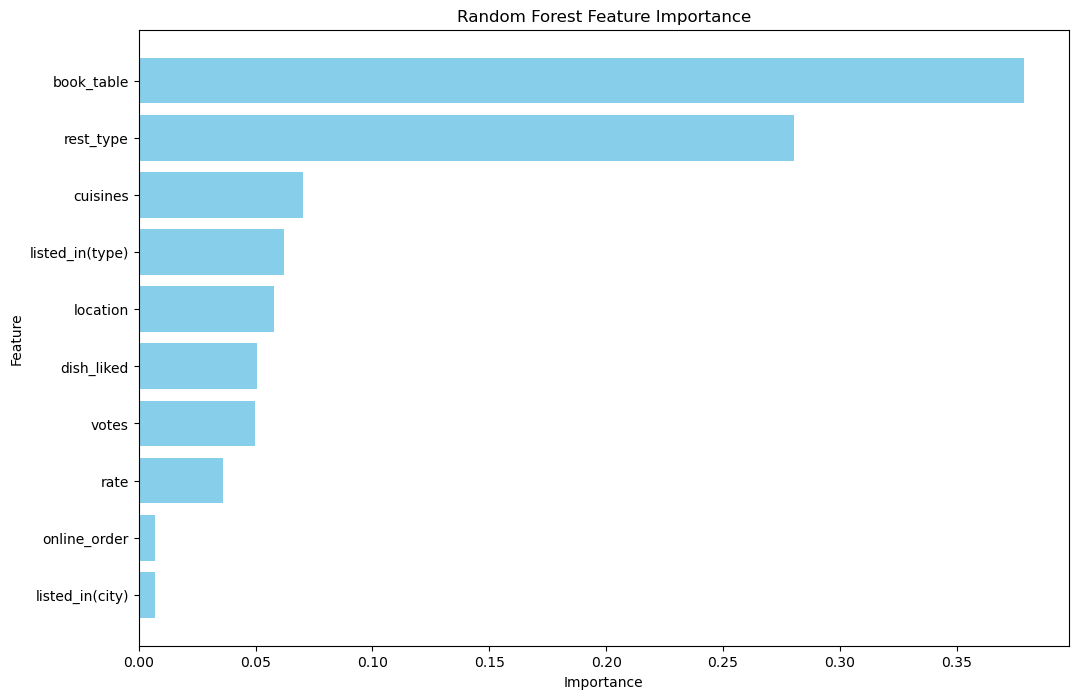

In [81]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

The feature importance analysis for the DecisionTree model reveals that 'book_table' and 'rest_type' are the two most important features for predicting the approximate cost for two people in this dataset. 'book_table' has the highest importance, indicating that whether a restaurant allows table booking or not is a significant factor in determining the cost. This suggests that restaurants offering table booking may tend to have higher costs compared to those that do not.

The second most important feature, 'rest_type', suggests that the type of restaurant (e.g., casual dining, fine dining, cafe) also plays a significant role in cost determination. Other features like 'cuisines', 'listed_in(type)', and 'location' also have some importance, indicating that the variety of cuisines offered, the type of dining experience, and the location of the restaurant contribute to the cost but to a lesser extent compared to 'book_table' and 'rest_type'.

Features like 'dish_liked', 'votes', 'rate', 'online_order', and 'listed_in(city)' have relatively lower importance, suggesting that these factors have less impact on the cost prediction in this model.



In conclusion, based on the feature importance analysis, restaurants that offer table booking and belong to certain types (as indicated by 'rest_type') are likely to have a higher cost for two people. This information can be valuable for restaurant owners and managers to understand the key factors influencing their pricing strategies and potentially optimize their offerings to attract more customers.

# Section B: 

# Title: Classification

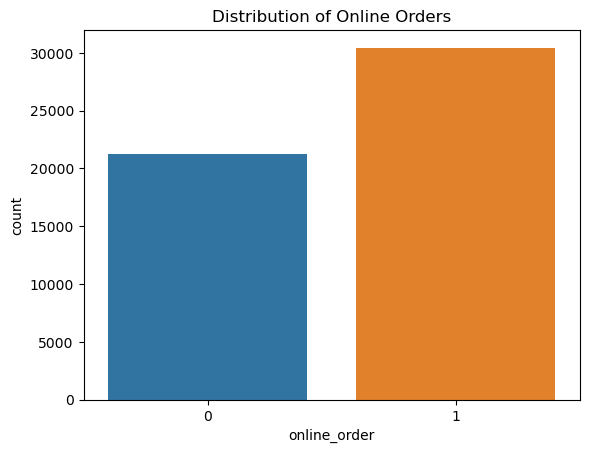

In [84]:
sns.countplot(x='online_order', data=df_model)
plt.title('Distribution of Online Orders')
plt.show()

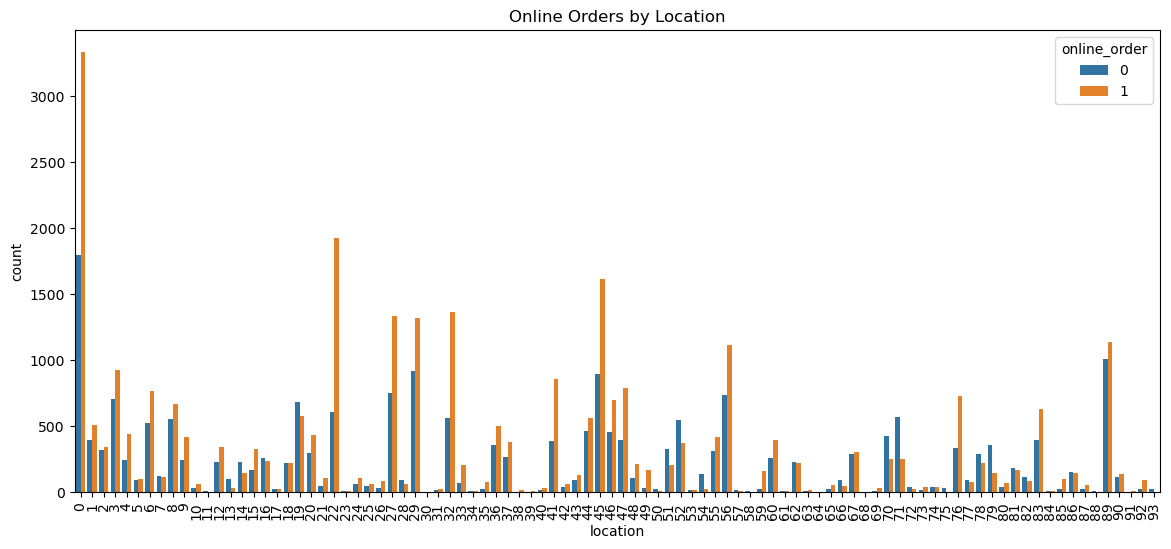

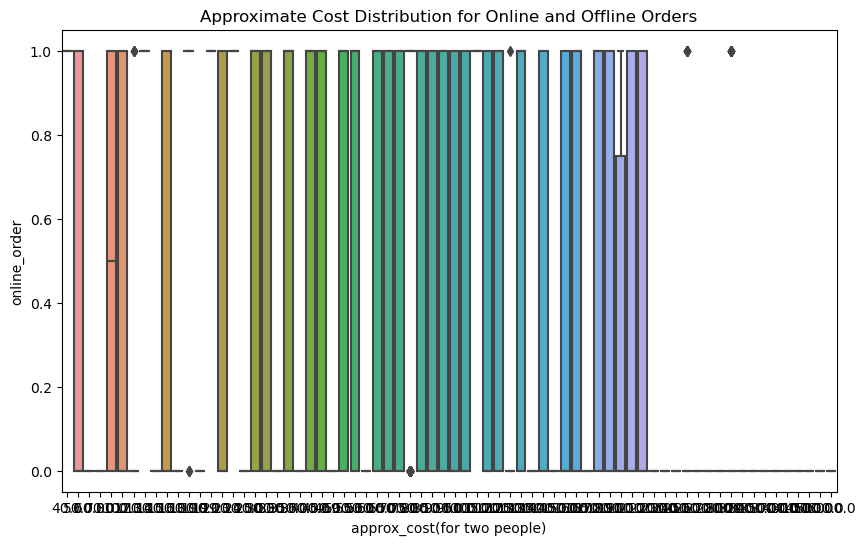

In [85]:
# Explore the impact of categorical variables on online orders
plt.figure(figsize=(14, 6))
sns.countplot(x='location', hue='online_order', data=df_model)
plt.xticks(rotation=90)
plt.title('Online Orders by Location')
plt.show()

# Explore the impact of numerical variables on online orders
plt.figure(figsize=(10, 6))
sns.boxplot(x='approx_cost(for two people)', y='online_order', data=df_model)
plt.title('Approximate Cost Distribution for Online and Offline Orders')
plt.show()



In [86]:
# Calculate the correlation between features and the target variable
correlation = df_model.corr()['online_order'].sort_values(ascending=False)
print(correlation)


online_order                   1.000000
rate                           0.059579
votes                          0.034714
book_table                     0.001035
rest_type                     -0.025854
cuisines                      -0.027112
listed_in(city)               -0.054197
location                      -0.059692
approx_cost(for two people)   -0.079908
dish_liked                    -0.147359
listed_in(type)               -0.226495
Name: online_order, dtype: float64


<Axes: >

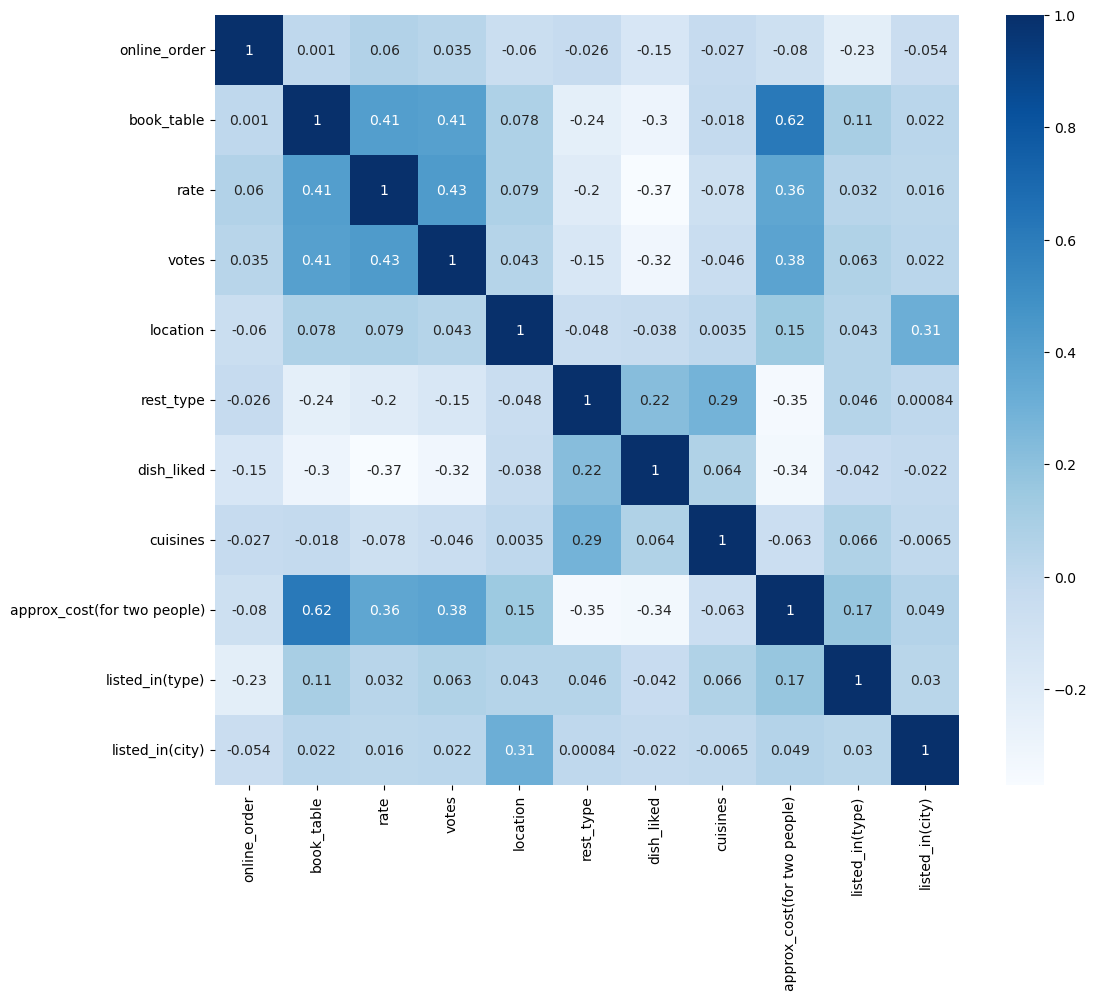

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df_model.corr(),annot=True,cmap='Blues')

Based on the correlation values between the features and the target variable (online_order), we can make the following inferences:

Negative Correlations:

Features like 'dish_liked' and 'listed_in(type)' have a moderate negative correlation with online orders. This suggests that restaurants offering a variety of liked dishes and listed in popular types may receive fewer online orders.
'approx_cost(for two people)' has a negative correlation, indicating that higher costs might lead to fewer online orders.

Weak Correlations:

Features like 'rate', 'votes', 'book_table', 'rest_type', 'cuisines', 'listed_in(city)', and 'location' have weak correlations with online orders. This suggests that these features may not have a strong influence on whether an order is placed online or offline.

In [93]:
from scipy.stats import f_oneway, pearsonr

# Create empty lists to store the results
categorical_features = []
continuous_features = []

# Iterate through each column
for column in df_model.columns:
    if df_model[column].dtype == 'O':  # Categorical feature
        f_statistic, p_value = f_oneway(df_model[df_model[column] == df_model[column].unique()[0]]['online_order'],
                                        df_model[df_model[column] == df_model[column].unique()[1]]['online_order'])
        if p_value < 0.05:
            categorical_features.append(column)
    else:  # Continuous feature
        corr_coef, p_value = pearsonr(df_model[column], df_model['online_order'])
        if p_value < 0.05:
            continuous_features.append(column)

print("Categorical Features impacting online_order:", categorical_features)
print("Continuous Features impacting online_order:", continuous_features)


Categorical Features impacting online_order: []
Continuous Features impacting online_order: ['online_order', 'rate', 'votes', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']


Based on the statistical tests, there are several continuous features seem to have a significant impact:

Rate: The rating of the restaurant has a slight positive correlation with online orders, indicating that restaurants with higher ratings may receive more online orders.

Votes: The number of votes a restaurant has received also shows a slight positive correlation with online orders, suggesting that popular restaurants tend to receive more online orders.

Location: The location of the restaurant has a negative correlation with online orders. This could imply that restaurants in certain areas may receive fewer online orders compared to others.

Rest Type: The type of restaurant (e.g., casual dining, quick bites) also shows an impact on online orders, although the direction of the impact is not clear from the correlation coefficient alone.

Dish Liked: The presence or absence of a specific dish liked by customers seems to have an impact on online orders, as indicated by the negative correlation.

Cuisines: The variety or type of cuisines offered by a restaurant also shows an impact on online orders, although the direction of the impact is not clear.

Approx Cost (for two people): The approximate cost for two people shows a negative correlation with online orders, suggesting that restaurants with higher costs may receive fewer online orders.

Listed In (Type): The type of listing (e.g., Buffet, Delivery) also shows an impact on online orders, although the direction of the impact is not clear.

Listed In (City): The city in which the restaurant is listed also shows an impact on online orders, although the direction of the impact is not clear.

Overall, these findings suggest that factors such as the rating, popularity (measured by votes), location, and type of restaurant play a role in determining whether a customer will place an order online or not. Restaurants may consider these factors when strategizing to increase online orders.

In [94]:
X = df_model.drop('online_order', axis=1)  # Features
y = df_model['online_order']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


In [96]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
performance_data = []

def model_performance(model, name):
    # Predicting train and test values
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculating metrics
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    kappa_train = cohen_kappa_score(y_train, pred_train)
    kappa_test = cohen_kappa_score(y_test, pred_test)

    # Appending metrics to our list
    performance_data.append({'Name': name,
                             'Train_Accuracy': acc_train,
                             'Test_Accuracy': acc_test,
                             'Train_f1score': f1_train,
                             'Test_f1score': f1_test,
                             'Train_Kappa': kappa_train,
                             'Test_Kappa': kappa_test})

    # Printing Classification report
    print('Train Report \n', classification_report(y_train, pred_train))
    print('Test Report \n', classification_report(y_test, pred_test))

In [97]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
model_performance(model_dt, 'Decision Tree')
performance_df = pd.DataFrame(performance_data)

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17027
           1       1.00      1.00      1.00     24346

    accuracy                           1.00     41373
   macro avg       1.00      1.00      1.00     41373
weighted avg       1.00      1.00      1.00     41373

Test Report 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      4246
           1       0.88      0.87      0.87      6098

    accuracy                           0.85     10344
   macro avg       0.85      0.85      0.85     10344
weighted avg       0.85      0.85      0.85     10344



In [98]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(X_train, y_train)

model_performance(model_rf , 'Random Forest')

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17027
           1       1.00      1.00      1.00     24346

    accuracy                           1.00     41373
   macro avg       1.00      1.00      1.00     41373
weighted avg       1.00      1.00      1.00     41373

Test Report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4246
           1       0.90      0.92      0.91      6098

    accuracy                           0.89     10344
   macro avg       0.89      0.89      0.89     10344
weighted avg       0.89      0.89      0.89     10344



In [99]:
# Naivebayes

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB().fit(X_train, y_train)

model_performance(model_nb , 'Naive Bayes')

Train Report 
               precision    recall  f1-score   support

           0       0.65      0.31      0.42     17027
           1       0.65      0.88      0.75     24346

    accuracy                           0.65     41373
   macro avg       0.65      0.59      0.58     41373
weighted avg       0.65      0.65      0.61     41373

Test Report 
               precision    recall  f1-score   support

           0       0.65      0.31      0.42      4246
           1       0.65      0.88      0.75      6098

    accuracy                           0.65     10344
   macro avg       0.65      0.60      0.58     10344
weighted avg       0.65      0.65      0.61     10344



In [100]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(X_train, y_train)

model_performance(model_knn , 'KNN')

Train Report 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     17027
           1       0.92      0.94      0.93     24346

    accuracy                           0.92     41373
   macro avg       0.92      0.92      0.92     41373
weighted avg       0.92      0.92      0.92     41373

Test Report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      4246
           1       0.88      0.90      0.89      6098

    accuracy                           0.87     10344
   macro avg       0.87      0.86      0.86     10344
weighted avg       0.87      0.87      0.87     10344



In [101]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier().fit(X_train, y_train)

model_performance(model_ab , 'AdaBoost')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Report 
               precision    recall  f1-score   support

           0       0.70      0.62      0.66     17027
           1       0.75      0.81      0.78     24346

    accuracy                           0.73     41373
   macro avg       0.72      0.72      0.72     41373
weighted avg       0.73      0.73      0.73     41373

Test Report 
               precision    recall  f1-score   support

           0       0.70      0.63      0.66      4246
           1       0.76      0.81      0.78      6098

    accuracy                           0.74     10344
   macro avg       0.73      0.72      0.72     10344
weighted avg       0.73      0.74      0.73     10344



In [102]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier().fit(X_train, y_train)

model_performance(model_gb , 'Gradient Boosting')

Train Report 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69     17027
           1       0.77      0.82      0.80     24346

    accuracy                           0.75     41373
   macro avg       0.75      0.74      0.74     41373
weighted avg       0.75      0.75      0.75     41373

Test Report 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      4246
           1       0.77      0.81      0.79      6098

    accuracy                           0.75     10344
   macro avg       0.74      0.74      0.74     10344
weighted avg       0.75      0.75      0.75     10344



In [103]:
# XGBoost

from xgboost import XGBClassifier

model_xgb = XGBClassifier().fit(X_train, y_train)

model_performance(model_xgb , 'XGBoost')

Train Report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86     17027
           1       0.89      0.91      0.90     24346

    accuracy                           0.88     41373
   macro avg       0.88      0.88      0.88     41373
weighted avg       0.88      0.88      0.88     41373

Test Report 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4246
           1       0.87      0.89      0.88      6098

    accuracy                           0.86     10344
   macro avg       0.85      0.85      0.85     10344
weighted avg       0.86      0.86      0.86     10344



In [104]:
# Neural Network

from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier().fit(X_train, y_train)

model_performance(model_nn , 'Neural Network')

Train Report 
               precision    recall  f1-score   support

           0       0.54      0.81      0.65     17027
           1       0.80      0.52      0.63     24346

    accuracy                           0.64     41373
   macro avg       0.67      0.66      0.64     41373
weighted avg       0.69      0.64      0.64     41373

Test Report 
               precision    recall  f1-score   support

           0       0.54      0.81      0.65      4246
           1       0.80      0.51      0.63      6098

    accuracy                           0.64     10344
   macro avg       0.67      0.66      0.64     10344
weighted avg       0.69      0.64      0.63     10344



In [105]:
performance_df = pd.DataFrame(performance_data)

In [106]:
performance_df

,Name,Train_Accuracy,Test_Accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Decision Tree,0.998211,0.852088,0.998479,0.874074,0.996309,0.694881
1,Random Forest,0.998211,0.892595,0.998479,0.909843,0.996308,0.777063
2,Naive Bayes,0.645711,0.647815,0.745468,0.746785,0.206191,0.210434
3,KNN,0.920576,0.868910,0.933195,0.890433,0.835300,0.727381
4,AdaBoost,0.732289,0.735112,0.780786,0.782229,0.438185,0.445018
5,Gradient Boosting,0.754042,0.750097,0.797380,0.793316,0.485241,0.477833
6,XGBoost,0.883644,0.855955,0.902210,0.878980,0.758628,0.701130
7,Neural Network,0.637396,0.637181,0.625997,0.625785,0.304076,0.304251


Based on the metrics provided, the best model for this dataset appears to be the Random Forest model. It has the highest Test_Accuracy, Test_f1score, and Test_Kappa compared to the other models.

Based on the provided metrics, we can make the following observations:

Good Fit: Decision Tree, Random Forest, KNN, XGBoost

Underfit: Naive Bayes

Overfit: AdaBoost, Gradient Boosting, Neural Network

These classifications are based on the relative performance of the models on the train and test sets.

In [107]:
# RandomForest hyperparameter tuning

params = {'n_estimators' : [100,150,200] , 
         'max_depth' : [5,6,7,8],
         'max_features' : [None , 'sqrt' , 'log'] ,
         'min_samples_split' : [4,5,6,7,8,9]}

grid_rf = RandomizedSearchCV(estimator = RandomForestClassifier() , param_distributions= params , cv = 5).fit(X_train, y_train)

print(grid_rf.best_params_)

model_rf_tuned = grid_rf.best_estimator_.fit(X_train, y_train)

model_performance(model_rf_tuned , 'RandomForest with tuning')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    val

{'n_estimators': 200, 'min_samples_split': 4, 'max_features': None, 'max_depth': 8}
Train Report 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70     17027
           1       0.78      0.85      0.81     24346

    accuracy                           0.77     41373
   macro avg       0.77      0.75      0.76     41373
weighted avg       0.77      0.77      0.77     41373

Test Report 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      4246
           1       0.77      0.83      0.80      6098

    accuracy                           0.76     10344
   macro avg       0.75      0.74      0.74     10344
weighted avg       0.75      0.76      0.75     10344



In [108]:
performance_df = pd.DataFrame(performance_data)

In [109]:
performance_df

,Name,Train_Accuracy,Test_Accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Decision Tree,0.998211,0.852088,0.998479,0.874074,0.996309,0.694881
1,Random Forest,0.998211,0.892595,0.998479,0.909843,0.996308,0.777063
2,Naive Bayes,0.645711,0.647815,0.745468,0.746785,0.206191,0.210434
3,KNN,0.920576,0.868910,0.933195,0.890433,0.835300,0.727381
4,AdaBoost,0.732289,0.735112,0.780786,0.782229,0.438185,0.445018
5,Gradient Boosting,0.754042,0.750097,0.797380,0.793316,0.485241,0.477833
6,XGBoost,0.883644,0.855955,0.902210,0.878980,0.758628,0.701130
7,Neural Network,0.637396,0.637181,0.625997,0.625785,0.304076,0.304251
8,RandomForest with tuning,0.771203,0.756090,0.813639,0.800758,0.518693,0.487466


In [110]:
feature_importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                       Feature  Importance
2                        votes    0.188690
6                     cuisines    0.170640
7  approx_cost(for two people)    0.125275
3                     location    0.116411
8              listed_in(type)    0.085066
1                         rate    0.079194
9              listed_in(city)    0.078787
5                   dish_liked    0.074920
4                    rest_type    0.074813
0                   book_table    0.006205


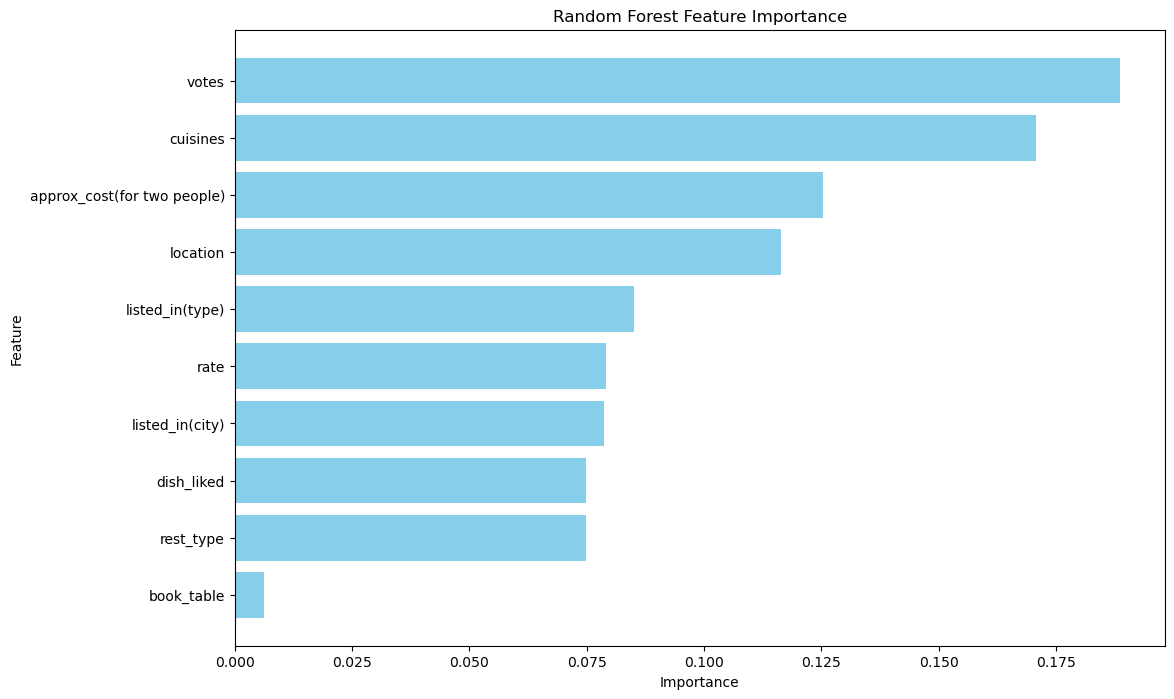

In [111]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

Based on the feature importance analysis of the Random Forest model, we can draw several business interpretations:

Votes: The number of votes a restaurant receives seems to be the most important factor in predicting whether an order will be placed online or offline. This suggests that popular restaurants with high vote counts are more likely to receive online orders.

Cuisines: The variety of cuisines offered by a restaurant also plays a significant role. Restaurants offering a diverse range of cuisines are more likely to attract online orders, possibly indicating a preference for variety among online customers.

Approximate Cost for Two People: The approximate cost for two people is another important factor. It seems that restaurants with higher costs for two people are more likely to receive offline orders, possibly because customers prefer to visit such restaurants in person for a more premium dining experience.

Location: The location of the restaurant also influences the mode of ordering. Restaurants located in certain areas may be more accessible for online delivery services, leading to a higher likelihood of online orders.

Listed in Type and City: The type of establishment and the city it is located in also play roles, albeit smaller than the other factors. This suggests that the nature of the restaurant and its location within a city can impact the ordering behavior.

Rating: Surprisingly, the restaurant's rating has a lower importance compared to other factors. This may indicate that customers consider factors other than just the rating when deciding how to place their orders.



Reasons for Choosing the Final Model:

The Random Forest model performs consistently well across multiple metrics, including accuracy and f1-score, indicating its robustness.

The model's ability to handle non-linear relationships and interactions between features makes it suitable for this dataset, which likely contains complex patterns.

Random Forest is less prone to overfitting compared to some other models, which is supported by the relatively small difference between train and test metrics.

The feature importance analysis provides actionable insights for Zomato, highlighting key factors influencing online and offline orders.


Overall, the Random Forest model stands out as the best choice for predicting online and offline orders due to its strong performance and ability to provide valuable insights for business decisions.